# British diet - Fecal mass distribution

In [21]:
#load required functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

import json
import os

capsize=6
#set colorscheme
colorav='k'
colorrefdiet='purple'
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"

results_for_figure2={}
import FPcalc #basic calculations of 


#dict to save major characteristics of British reference diet
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/BRD_characteristics.json', 'r') as fp:
        BRD = json.load(fp)
except:
    BRD={}
    
display(BRD)
import FPcalc #basic calculations of 


{'energy': 2275.0,
 'carbohydrates': 276.75,
 'sugars': 59.0,
 'proteins': 72.05000000000001,
 'fat': 105.5,
 'fiber': 19.9,
 'fiber_low': 14.599999999999998,
 'fiber_high': 25.2,
 'carbLI_standard': 35.670500000000004,
 'carbLI_higher': 44.6025,
 'carbLI_lower': 25.755000000000003,
 'carbLI_error': 9.423749999999998,
 'bacwetweight': 117.72413793103448,
 'fecalwetmass': 117.72413793103448,
 'fecaldrymass': 29.58620689655172,
 'fecaldrymassstd': 6.845624030794191,
 'fecealfractionbac': 0.546888888888889,
 'bacterialdrymass_feces': 16.180367816091955,
 'energybacteria_fromfeces': 101.11785577697411,
 'FP_fromfeces': 471.0230005849163,
 'FP_fromfeces_g': [10.904335695602317,
  2.153651111637971,
  5.520037668578593,
  6.865692286187041,
  2.47897326682256,
  4.179730053279632],
 'FP_fromfeces_gsum': 32.10242008210811,
 'energyfrac_fromfeces': 0.04444740913273587,
 'energybacteria_fromfeces_error': 23.39653832171075,
 'energyfrac_fromfeces_error': 0.010284192668883845,
 'FP_fromfeces_erro

# Analysis of fecal dry and wet weight data

/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_1909/2054786765.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  drymassfraction_fit, _, _, _ = np.linalg.lstsq(xcolvec, y)


'relation between wet and dry weight (slope and offset)'

array([0.24141097])


av and std wet weight (g/day)
117.72413793103448
38.07424376202291
av and std dry weight (g/day)
29.58620689655172
6.845624030794191
fraction of fecal wet weight ending up as dry weight*** to be used for Burit data
0.25131810193321613


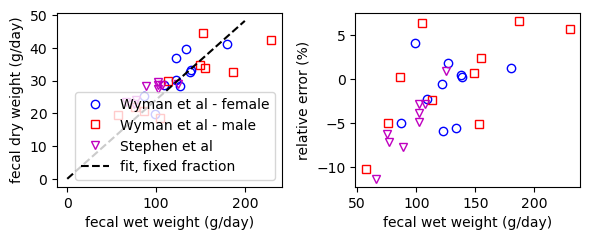

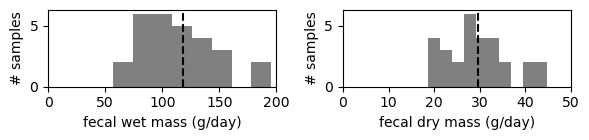

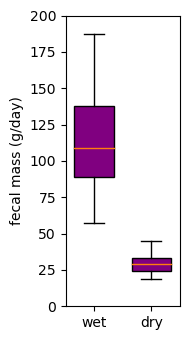

In [22]:

#load data on weight distribution of different studies
BDdata=pd.read_csv('data/weightdistribution.csv',skiprows=1)

########################################
#plot relation between wet and dry weight for British reference diet
#########################################

fig, axs = plt.subplots(1,2, figsize=(6,2.5))
#axs=[axs]

#plot dry and wet weight data for each study
axs[0].plot(BDdata['WET_WymanTable1'],BDdata['DRY_WymanTable1'],marker='o',ls='',c='b',label='Wyman et al - female',fillstyle='none')
axs[0].plot(BDdata['WET_WymanTable3'],BDdata['DRY_WymanTable3'],marker='s',ls='',c='r',label='Wyman et al - male',fillstyle='none')
axs[0].plot(BDdata['WET_Stephen'],BDdata['DRY_Stephen'],marker='v',ls='',c='m',label='Stephen et al ',fillstyle='none')
#linear fits between dry weight and wet weight for each study
fitc1=np.polyfit(BDdata['WET_WymanTable1'],BDdata['DRY_WymanTable1'],1)
fitc2=np.polyfit(BDdata['WET_WymanTable3'],BDdata['DRY_WymanTable3'],1)
fitc3=np.polyfit(BDdata['WET_Stephen'][:-1],BDdata['DRY_Stephen'][:-1],1)

#consideration of all points together
x=np.concatenate((BDdata['WET_WymanTable1'],BDdata['WET_WymanTable3'],BDdata['WET_Stephen'][:-1]),axis=0)
BRD["bacwetweight"]=x.mean()
y=np.concatenate((BDdata['DRY_WymanTable1'],BDdata['DRY_WymanTable3'],BDdata['DRY_Stephen'][:-1]),axis=0)
xlin=np.linspace(0,200,10)

# Our model is y = a * x, so things are quite simple, in this case...
# x needs to be a column vector instead of a 1D vector for this, however.
xcolvec = x[:,np.newaxis]
drymassfraction_fit, _, _, _ = np.linalg.lstsq(xcolvec, y)

#plot ifts
axs[0].set_xlabel('fecal wet weight (g/day)')
axs[0].set_ylabel('fecal dry weight (g/day)')

axs[1].plot(BDdata['WET_WymanTable1'],100*(BDdata['WET_WymanTable1']*drymassfraction_fit-BDdata['DRY_WymanTable1'])/BDdata['WET_WymanTable1'],marker='o',ls='',c='b',label='Wyman et al - female',fillstyle='none')
axs[1].plot(BDdata['WET_WymanTable3'],100*(BDdata['WET_WymanTable3']*drymassfraction_fit-BDdata['DRY_WymanTable3'])/BDdata['WET_WymanTable3'],marker='s',ls='',c='r',label='Wyman et al - male',fillstyle='none')
axs[1].plot(BDdata['WET_Stephen'],100*(BDdata['WET_Stephen']*drymassfraction_fit-BDdata['DRY_Stephen'])/BDdata['WET_Stephen'],marker='v',ls='',c='m',label='Stephen et al ',fillstyle='none')

axs[0].plot(xlin,xlin*drymassfraction_fit,ls='--',c='k',label='fit, fixed fraction')

axs[1].set_xlabel('fecal wet weight (g/day)')
axs[1].set_ylabel('relative error (%)')
#plot relation
display("relation between wet and dry weight (slope and offset)")
display(drymassfraction_fit)

#plot averages into plot as well
#axs[0].axvline(x.mean(),c='k',ls=":",label='mean all data')
#axs[0].axhline(y.mean(),c='k',ls=':')
#axs[0].axvline(BDdata['WET_Stephen'][:-1].mean(),ls=':',c='g',label='mean Stephen')
#axs[0].axhline(BDdata['DRY_Stephen'][:-1].mean(),ls=':',c='g')
#axs[0].legend()

print()
print('av and std wet weight (g/day)')
print(x.mean())
print(x.std())
BRD["fecalwetmass"]=x.mean()


print("av and std dry weight (g/day)")
print(y.mean())
print(y.std())

BRD["fecaldrymass"]=y.mean()
BRD["fecaldrymassstd"]=y.std()

print('fraction of fecal wet weight ending up as dry weight*** to be used for Burit data')
print(y.mean()/x.mean())
axs[0].legend()
fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_fecal_scatter.pdf")


############
# plot histogram of all fecal mass data
###########

fig, axs = plt.subplots(1,2, figsize=(6,1.5))

axs[0].hist(x,label="wet",color='gray')
axs[1].hist(y,label="dry",color='gray')
axs[0].set_xlabel("fecal wet mass (g/day)")
axs[1].set_xlabel("fecal dry mass (g/day)")

axs[0].set_ylabel("# samples")
axs[1].set_ylabel("# samples")


axs[0].axvline(BRD["bacwetweight"],color='k',ls='--')
axs[1].axvline(BRD["fecaldrymass"],color='k',ls='--')


axs[0].set_xlim(0,200)
axs[1].set_xlim(0,50)
            
fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_fecal_hist.pdf")

############
# plot box plots with distribution of wet and dry weight
###########
fig, axs = plt.subplots(1,1, figsize=(2,3.5))
axs=[axs]

databox=[x,y]
bplot1=axs[0].boxplot(databox,labels=["wet","dry"],vert=True,showfliers=True, widths=[0.7]*2,patch_artist=True)#,"Mice (autoclaved lab coy)"])

colors=[colorrefdiet]*2
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)


axs[0].set_ylabel('fecal mass (g/day)')
axs[0].set_ylim(0,200)
fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_fecal_box.pdf")


# A more detailed analysis of water content in feces

funct parwater lin
[4.63384822e-04 6.85305059e-01]
funct parwater 3
[ 0.49246012  0.03076236 -0.00070195]
pearson coefficient - fecal drymass fraction and wet weight
[[1.         0.69976807]
 [0.69976807 1.        ]]
pearson coefficient - transit time and wet weight
[[ 1.         -0.54258485]
 [-0.54258485  1.        ]]


/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_1909/1642038686.py:115: RuntimeWarning: divide by zero encountered in divide
  return a +b/(x)


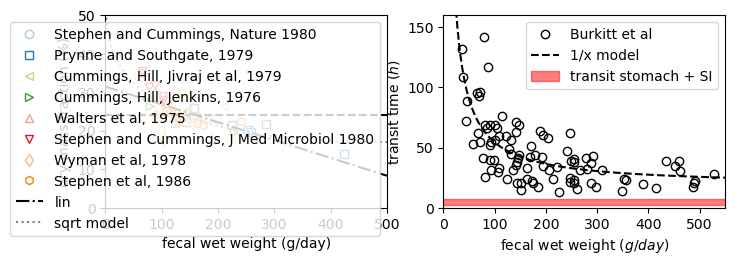

In [23]:
watercontent=pd.read_csv("data/watercontent.csv")

colorl3=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

#load study
#use all studies, including some where diet was changed. But explude here Wyman data as that data tend to scatter much more
#watercontent=watercontent.loc[watercontent['source'] != 'Wyman et al, 1978']
x=watercontent['fec_wet']
y=watercontent['water']/100.
studylist=watercontent.source.unique()


#define functions to describe relation between fecal wet and dry weight

#fit non-linear function to data
def func2_waterc(x, a, b):
  return a +b*np.sqrt(x)
  #return a * np.log(b * x) + c
from scipy.optimize import curve_fit

#fit non-linear function to data
def func3_waterc(x, a, b, c):
  return a +b*np.sqrt(x)+c*x
  #return a * np.log(b * x) + c


#fit non-linear function to data
def func4_waterc(x, a, b):
  return 1-(a+b/x)
  #return a * np.log(b * x) + c

from scipy.optimize import curve_fit

#plot data and fits
fig, axs = plt.subplots(1,2, figsize=(8,2.5))
markerlist=['o','s','<','>','^','v','d','h']
#plot data from different stuides
ilc=-1
for il in studylist:
    ilc=ilc+1
    sel=watercontent.loc[watercontent['source'] ==il]
    #axs[0].plot(sel['fec_wet'],sel['water'],marker=markerlist[ilc],color=colorl3[ilc],ls='',label=il,fillstyle='none')
    axs[0].plot(sel['fec_wet'],100.-sel['water'],marker=markerlist[ilc],color=colorl3[ilc],ls='',label=il,fillstyle='none')
    
    #axs[0].plot(BDdata['WET_WymanTable1'],BDdata['DRY_WymanTable1'],marker='o',ls='',c='b',label='Wyman et al - female',fillstyle='none')


#plot constant value

#axs[0].axhline(100-100*drymassfraction_fit,ls='--',color='k',label='const. fraction')
axs[0].axhline(100*drymassfraction_fit,ls='--',color='k')


#add linear fit
fit=np.polyfit(x,y,1)
linfit_water_par=fit
print("funct parwater lin")
print(linfit_water_par)
xr=np.linspace(0,500)
xr2=np.linspace(50,500)
#axs[0].plot(xr,100*(xr*fit[0]+fit[1]),color='k',label="linear model",ls='-.')
axs[0].plot(xr,100-100*(xr*fit[0]+fit[1]),color='k',label="lin",ls='-.')

#add sqrt fit
#popt, pcov = curve_fit(func2_waterc, x, y)
#func2_water=popt
#print("funct parwater 2")
#print(func2_water)
#axs[0].plot(xr, 100*func2_waterc(xr, *func2_water), color='r',ls='--', label="sqrt (2)")
#axs[1].plot(xr, 100-100*func2_waterc(xr, *func2_water), color='r',ls='--', label="sqrt")

#add other non-linear fit
popt, pcov = curve_fit(func3_waterc, x, y)
func3_water_par=popt
print("funct parwater 3")
print(func3_water_par)
#axs[0].plot(xr, 100*func3_waterc(xr, *func3_water_par), color='gray',ls=':', label="sqrt model")
axs[0].plot(xr,100-100*func3_waterc(xr, *func3_water_par), color='gray',ls=':', label="sqrt model")

#add 1/x fit
#popt, pcov = curve_fit(func4_waterc, x, y)
#func4_water_par=popt
#print("funct parwater 4 noWhyman")
#print(func4_water_par)
#axs[0].plot(xr2, 100*func4_waterc(xr2, *func4_water_par), color='magenta',ls=':', label="1/x (4)")
#axs[1].plot(xr2, 100-100*func4_waterc(xr2, *func4_water_par), color='magenta',ls=':', label="1/x")


axs[0].set_xlabel('fecal wet weight (g/day)')
axs[0].set_ylabel('dry mass fraction (%)')
axs[0].legend()

axs[0].set_xlim(0,500)
axs[0].set_ylim(0,50)


pearsonc=np.corrcoef(x,y)
print('pearson coefficient - fecal drymass fraction and wet weight')
print(pearsonc)


#### plot transit time into same figure

Burkittdata=pd.read_csv('data/burkitt_data2.csv')

###look at transit time vs fecal weight
axs[1].plot(Burkittdata['fecal weight'],Burkittdata['transit time'],ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Burkitt et al')
axs[1].set_xlabel("fecal wet weight $(g/day)$")
axs[1].set_ylabel("transit time $(h)$")
axs[1].set_xlim(0,550)
axs[1].set_ylim(0,160)

#fit non-linear function to data
def func2(x, a, b):
  return a +b/(x)
  #return a * np.log(b * x) + c
xc=Burkittdata['fecal weight']
yc=Burkittdata['transit time']
#print(xc)
#print(yc)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func2, xc, yc)
xcc=np.linspace(0,75,100)
#axs[2].plot(xcc, func(xcc, *popt), color='k', label="Fitted Curve")
#p0 = popt[:2]
popt, pcov = curve_fit(func2, xc, yc,method='trf')
xcc=np.linspace(0,600,200)
axs[1].plot(xcc, func2(xcc, *popt), color='k',ls='--', label="1/x model")

#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4015195/#:~:text=The%20normal%20range%20for%20transit,(10–73%20hours).
#axs[1].axhline(2,color='r',ls='--',label="transit stomach + SI")
x=np.linspace(0,600)
axs[1].fill_between(x, 0*x+2, 0*x+7, color='red', alpha=0.5,label="transit stomach + SI")
print('pearson coefficient - transit time and wet weight')

pearson_transittime=np.corrcoef(xc,yc)
print(pearson_transittime)
axs[1].legend()

fig.savefig("plot_output_figure2/fecaldrymassfraction_trend.pdf")


In [24]:
#fraction bacterial dry weight

BRD["fecealfractionbac"]=0.546888888888889

In [25]:

#save updated results
display(BRD)

with open('data_analysisresults/BRD_characteristics.json', 'w') as fp:
    json.dump(BRD, fp)

{'energy': 2275.0,
 'carbohydrates': 276.75,
 'sugars': 59.0,
 'proteins': 72.05000000000001,
 'fat': 105.5,
 'fiber': 19.9,
 'fiber_low': 14.599999999999998,
 'fiber_high': 25.2,
 'carbLI_standard': 35.670500000000004,
 'carbLI_higher': 44.6025,
 'carbLI_lower': 25.755000000000003,
 'carbLI_error': 9.423749999999998,
 'bacwetweight': 117.72413793103448,
 'fecalwetmass': 117.72413793103448,
 'fecaldrymass': 29.58620689655172,
 'fecaldrymassstd': 6.845624030794191,
 'fecealfractionbac': 0.546888888888889,
 'bacterialdrymass_feces': 16.180367816091955,
 'energybacteria_fromfeces': 101.11785577697411,
 'FP_fromfeces': 471.0230005849163,
 'FP_fromfeces_g': [10.904335695602317,
  2.153651111637971,
  5.520037668578593,
  6.865692286187041,
  2.47897326682256,
  4.179730053279632],
 'FP_fromfeces_gsum': 32.10242008210811,
 'energyfrac_fromfeces': 0.04444740913273587,
 'energybacteria_fromfeces_error': 23.39653832171075,
 'energyfrac_fromfeces_error': 0.010284192668883845,
 'FP_fromfeces_erro

We use here the sqrt model, which describes the avialable data well and additionally assumes that for very high fecal wet weights the dry mass fraction (>300g/day) is not falling further. We expect this assumption to be not physiological, as for higher wet weight the fraction of drymass presumably falls further. However, without further data for high fecal weight this assumption is an upper boundary of dry mass.